In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

## Lectura de datos

In [10]:
df = pd.read_csv("../data/raw_data.csv")

## Descripción de las variables

+ **fecha**: Fecha del día, YYYY-MM-DD.

+ **indicativo**: Indicativo climatológico.

+ **nombre**: Ubicación de la estación.

+ **provincia**: Provincia de la estación.

+ **altitud**: Altitud de la estación sobre el nivel del mar, en m.

+ **tmed**: Temperatura media diaria, en °C.

+ **prec**: Precipitación diaria acumulada, en mm.

+ **tmin**: Temperatura mínima, en °C.

+ **horatmin**: Hora y minuto de la temperatura mínima, UTC.

+ **tmax**: Temperatura máxima, en °C.

+ **horatmax**: Hora y minuto de la temperatura máxima, UTC.

+ **dir** : Dirección de la racha máxima, en decenas de grado. 99 = dato faltante, 88 = sin dato.

+ **velmedia**: Velocidad media del viento, en m/s.

+ **racha**: Racha máxima del viento, en m/s.

+ **horaracha**: Hora y minuto de la racha máxima, UTC.

+ **hrMedia**: Humedad relativa media diaria, en %.

+ **hrMax**: Humedad relativa máxima diaria, en %.

+ **horaHrMax**: Hora de la humedad relativa máxima diaria, UTC.

+ **hrMin**: Humedad relativa mínima diaria, en %.

+ **horaHrMin**: Hora de la humedad relativa mínima diaria, UTC.

## Visualización de los primeros registros

In [11]:
df.head()

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,dir,velmedia,racha,horaracha,hrMedia,hrMax,horaHrMax,hrMin,horaHrMin
0,2018-01-01,8409X,LLÍRIA,VALENCIA,198,"12,7","0,0","7,9",03:44,"17,5",13:36,25.0,"5,8","13,6",14:40,36.0,54.0,Varias,26.0,13:10
1,2018-01-02,8409X,LLÍRIA,VALENCIA,198,"14,7","0,0","9,8",02:54,"19,6",15:01,26.0,"6,1","14,4",00:10,51.0,69.0,03:00,40.0,14:10
2,2018-01-03,8409X,LLÍRIA,VALENCIA,198,"16,0","0,0","9,7",02:32,"22,2",14:34,28.0,"5,6","15,3",11:30,54.0,76.0,02:40,44.0,Varias
3,2018-01-04,8409X,LLÍRIA,VALENCIA,198,"18,2","0,0","14,5",23:57,"22,0",13:23,28.0,"6,9","16,1",16:10,53.0,66.0,05:20,43.0,12:40
4,2018-01-05,8409X,LLÍRIA,VALENCIA,198,"11,6","0,0","5,2",23:59,"18,0",13:38,30.0,"5,8","15,8",10:10,49.0,84.0,23:59,40.0,Varias


## Formato de las variables

In [12]:
print(f"Dimensiones: {df.shape}")
print(df.info())

Dimensiones: (1823, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1823 entries, 0 to 1822
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fecha       1823 non-null   object 
 1   indicativo  1823 non-null   object 
 2   nombre      1823 non-null   object 
 3   provincia   1823 non-null   object 
 4   altitud     1823 non-null   int64  
 5   tmed        1792 non-null   object 
 6   prec        1820 non-null   object 
 7   tmin        1792 non-null   object 
 8   horatmin    1792 non-null   object 
 9   tmax        1792 non-null   object 
 10  horatmax    1792 non-null   object 
 11  dir         1802 non-null   float64
 12  velmedia    1814 non-null   object 
 13  racha       1802 non-null   object 
 14  horaracha   1802 non-null   object 
 15  hrMedia     1805 non-null   float64
 16  hrMax       1797 non-null   float64
 17  horaHrMax   1797 non-null   object 
 18  hrMin       1797 non-null   float64
 19  hor

## Cambio de formato de las variables

In [13]:
floats = ['tmed', 'prec', 'tmin', 'tmax', 'velmedia', 'racha']
for i in floats:
    df[i] = df[i].str.replace(",", ".")
    df[i] = df[i].astype(float)

df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d')

strs = ['indicativo', 'nombre', 'provincia', 'horatmin', 'horatmax', 'horaracha', 'horaHrMax', 'horaHrMin']
for i in strs:
    df[i] = df[i].astype(str)

## Valores faltantes

### Reemplazar los datos con valor igual a 88 por `nan` en la columna **dir**

In [14]:
df['dir'] = df['dir'].replace(88, np.nan)

### Cantidad de valores faltantes en cada variable

In [15]:
df.isnull().sum()

fecha          0
indicativo     0
nombre         0
provincia      0
altitud        0
tmed          31
prec           3
tmin          31
horatmin       0
tmax          31
horatmax       0
dir           21
velmedia       9
racha         21
horaracha      0
hrMedia       18
hrMax         26
horaHrMax      0
hrMin         26
horaHrMin      0
dtype: int64

### Imputacion de valores faltantes mediante KNN

In [16]:
imputer = KNNImputer(n_neighbors=3)
variables_nas = ['tmed', 'prec', 'tmin', 'tmax', 'velmedia', 'dir', 'racha', 'hrMedia', 'hrMax', 'hrMin']
df[variables_nas] = imputer.fit_transform(df[variables_nas])
df.isnull().sum()

fecha         0
indicativo    0
nombre        0
provincia     0
altitud       0
tmed          0
prec          0
tmin          0
horatmin      0
tmax          0
horatmax      0
dir           0
velmedia      0
racha         0
horaracha     0
hrMedia       0
hrMax         0
horaHrMax     0
hrMin         0
horaHrMin     0
dtype: int64

## Guardar datos procesados

In [17]:
df.to_csv('../data/processed_data.csv')

## Análisis univariante

## Gráfico de densidades

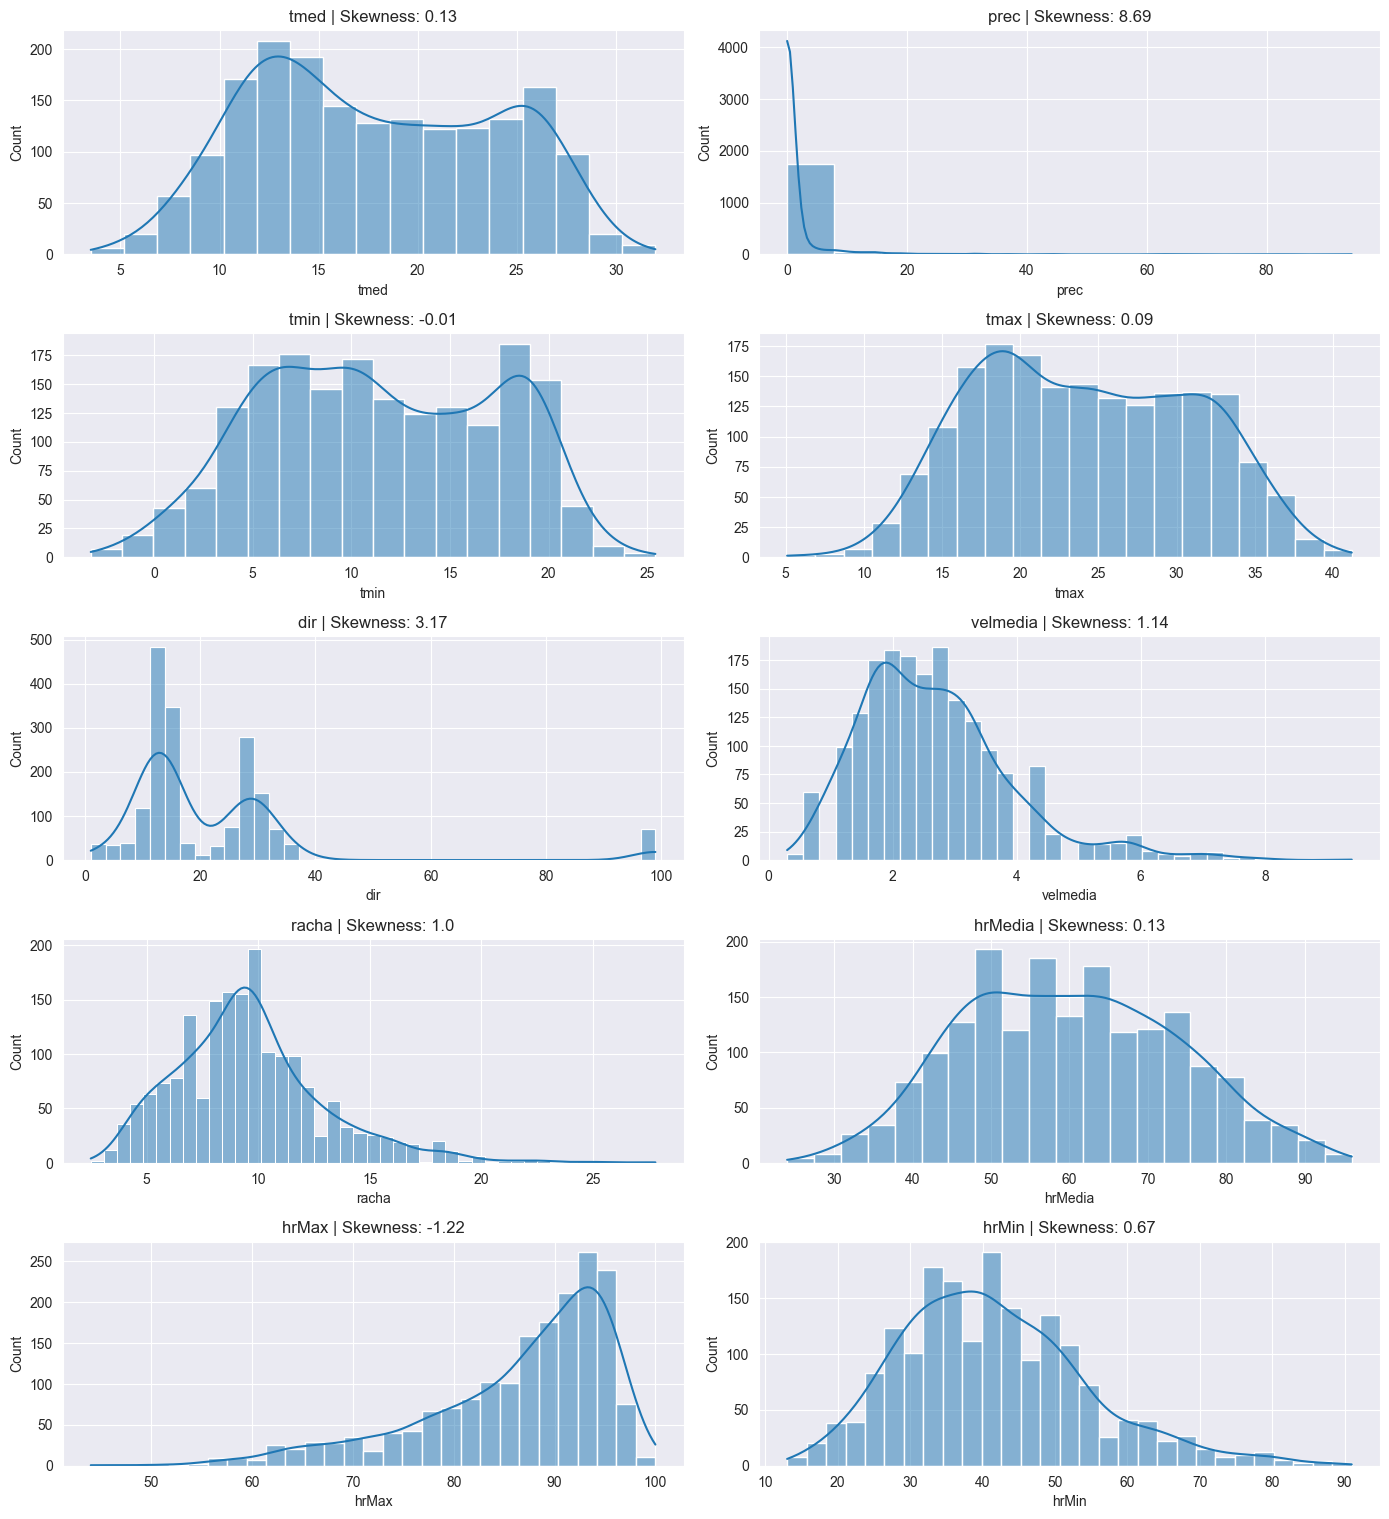

In [18]:
sns.set_style("darkgrid")

numerical_columns = df.select_dtypes(include=["float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

## Análisis multivariante

### Gráfico de correlación

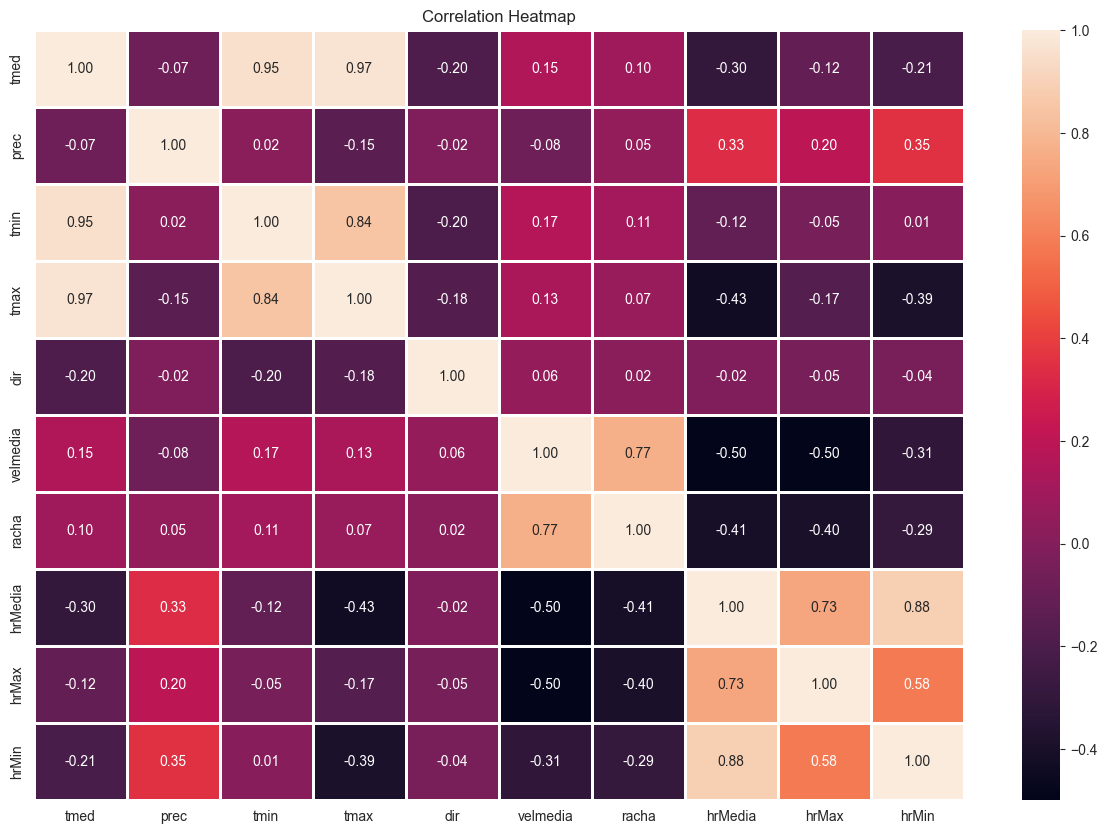

In [19]:
plt.figure(figsize=(15, 10))

sns.heatmap(df.select_dtypes(include=["float64"]).corr(), annot=True, fmt='.2f', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()